## ML Lab External Exam - SET 2
## Name: Thallapelli Shiva
## ID: B200194
## Class: CSE-C2

## Dataset Description

<b>Data Set Information:</b>

Car Evaluation dataset evaluates cars according to the following concepts
<ul>
<li><b>buying</b> - buying price
<li><b>maint</b> - price of the maintenance
<li><b>COMFORT</b> - comfort
<li><b>doors</b> - number of doors
<li><b>persons</b> - capacity in terms of persons to carry
<li><b>lug_boot</b> - the size of luggage boot
<li><b>safety</b> - estimated safety of the car
</ul>


<b>Car Acceptance(Output Class):</b>
unacc, acc, good, vgood 

from the given data you need to buid machine learnig model for Car Acceptance 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import plot_tree

/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
#Import Dataset - set2_data.csv 
df=pd.read_csv('set2_data.csv')

In [3]:
# Print top 5 and random 5 values - 2 Marks
print(df.head(5),'\n')

for i in range(5):
  random = np.random.randint(0,df.shape[0])
  print("randommmmm : ",random)
  print(df.iloc[random])
  # print('i == ',i)

  buying  maint doors persons lug_boot safety car_acceptability
0  vhigh  vhigh     2       2    small    low             unacc
1  vhigh  vhigh     2       2    small    med             unacc
2  vhigh  vhigh     2       2    small   high             unacc
3    NaN  vhigh     2       2      med    low             unacc
4  vhigh    NaN     2       2      med    med             unacc 

randommmmm :  1498
buying                 low
maint                 high
doors                5more
persons                  4
lug_boot               med
safety                 med
car_acceptability      acc
Name: 1498, dtype: object
randommmmm :  261
buying               vhigh
maint                  med
doors                    3
persons               more
lug_boot             small
safety                 low
car_acceptability    unacc
Name: 261, dtype: object
randommmmm :  239
buying               vhigh
maint                  med
doors                    2
persons               more
lug_boot              

In [4]:
#Print column names - 1 Marks
print(df.columns)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'car_acceptability'],
      dtype='object')


In [5]:
#Check the data type of each column - 1 Marks
# print(df.info())
print(df.dtypes)

buying               object
maint                object
doors                object
persons              object
lug_boot             object
safety               object
car_acceptability    object
dtype: object


In [6]:
#Print number of rows and columns - 1 Mark
print("rows : ",df.shape[0])
print("columns : ",df.shape[1])

rows :  1728
columns :  7


In [7]:
#Print summary statistics of all variables - 1 Mark
print(df.describe())

       buying maint doors persons lug_boot safety car_acceptability
count    1727  1726  1728    1727     1727   1727              1728
unique      4     4     4       3        3      3                 4
top      high  high     2       2      med    low             unacc
freq      432   432   432     576      576    576              1210


In [8]:
#Print the number of missing values in each column - 1 Marks
print(df.isnull().sum())

buying               1
maint                2
doors                0
persons              1
lug_boot             1
safety               1
car_acceptability    0
dtype: int64


In [9]:
#Impute missing values - Replace missing categorical values with mode and numerical values with mean of the column - 3 Marks
#Print the number of missing values in each column after imputation
print("Before : \n",df)

cols=df.select_dtypes(include='object').columns
for col in cols:
    df[col]=df[col].fillna(df[col].mode()[0])

# print("After : \n",df)
print("nulll : \n",df.isnull().sum())
# for col in df.columns:
#   df[col]=pd.to_numeric(df[col],errors='coerce')
# if df.iloc[3].values=='NaN':
#   print("yes")  
# else:
#   print("faslse")
# print(df.iloc[3].values)
# print("hiiii",df['buying'].values[3])

# tmp=df['buying'].value_counts()
# # print(type(undefined))
# # type(tmp)
# # print(type())

# for col in df.columns:
#   ans=[]
#   for val in df[col].values:
#     if type(val)=='NaN':
      
#       ans.append(df[col].mode())
#     else:
#       ans.append(val)
#   df[col]=ans


# print("After : \n",df)
# print('\n')


Before : 
      buying  maint  doors persons lug_boot safety car_acceptability
0     vhigh  vhigh      2       2    small    low             unacc
1     vhigh  vhigh      2       2    small    med             unacc
2     vhigh  vhigh      2       2    small   high             unacc
3       NaN  vhigh      2       2      med    low             unacc
4     vhigh    NaN      2       2      med    med             unacc
...     ...    ...    ...     ...      ...    ...               ...
1723    low    low  5more    more      med    med              good
1724    low    low  5more    more      med   high             vgood
1725    low    low  5more    more      big    low             unacc
1726    low    low  5more    more      big    med              good
1727    low    low  5more    more      big   high             vgood

[1728 rows x 7 columns]
nulll : 
 buying               0
maint                0
doors                0
persons              0
lug_boot             0
safety               0


In [10]:
#Print count of each class - 1 Marks
for col in df.columns:
  print(df[col].value_counts())

buying
high     433
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     434
med      432
low      432
vhigh    430
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       577
more    576
4       575
Name: count, dtype: int64
lug_boot
big      577
med      576
small    575
Name: count, dtype: int64
safety
high    577
low     576
med     575
Name: count, dtype: int64
car_acceptability
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


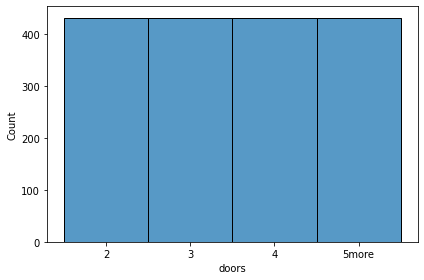

In [11]:
#Plot histogram of values doors column - 1 Marks 

sns.histplot(data=df,x='doors')
plt.tight_layout()
plt.show()

val cnt :  [433 432 432 431]


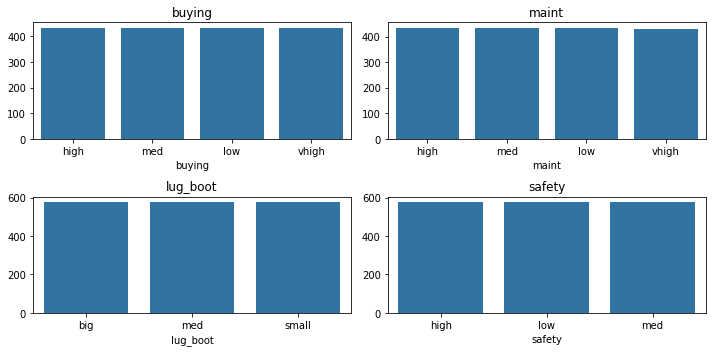

In [12]:
# Plot bar of buying, maint, lug_boot, safety using 2X2 subplots - 3 Marks
#num_bins = 10

print("val cnt : ",df['buying'].value_counts().values)
cols=['buying','maint','lug_boot','safety']
plt.figure(figsize=[10,5])

for i,col in enumerate(cols,0):
    plt.subplot(2,2,i+1)
    # sns.barplot(data=df[col])
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)  # Proper use of sns.barplot

    plt.title(col)
plt.tight_layout()
plt.show()

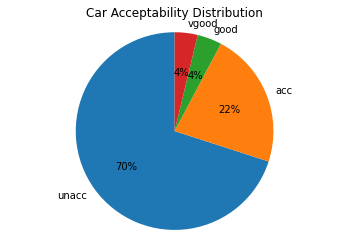

In [13]:
#Pie chart based on Car acceptability grouping - 1 Marks

car_acceptability_counts = df['car_acceptability'].value_counts()

plt.pie(car_acceptability_counts, labels=car_acceptability_counts.index, startangle=90,autopct="%1.0f%%")
plt.title('Car Acceptability Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [14]:
#Replace the value 5more and more with 5 in doors column - 1 Marks

print("before : ",df)
# ans=[]
# print(df['doors'].values)
# for val in df['doors'].values:
#   # print(val)
#   if (val=='5more') | (val=='more'):
#     # print("hii")
#     ans.append('5')
#   else:
#     ans.append(val)

# df['doors']=ans

df['doors']=df['doors'].replace(['5more','more'],'5')

print("After : ",df['doors'].values)
print(df)


before :       buying  maint  doors persons lug_boot safety car_acceptability
0     vhigh  vhigh      2       2    small    low             unacc
1     vhigh  vhigh      2       2    small    med             unacc
2     vhigh  vhigh      2       2    small   high             unacc
3      high  vhigh      2       2      med    low             unacc
4     vhigh   high      2       2      med    med             unacc
...     ...    ...    ...     ...      ...    ...               ...
1723    low    low  5more    more      med    med              good
1724    low    low  5more    more      med   high             vgood
1725    low    low  5more    more      big    low             unacc
1726    low    low  5more    more      big    med              good
1727    low    low  5more    more      big   high             vgood

[1728 rows x 7 columns]
After :  ['2' '2' '2' ... '5' '5' '5']
     buying  maint doors persons lug_boot safety car_acceptability
0     vhigh  vhigh     2       2    small  

In [15]:
#Apply label encoder for categorical columns -  2 Marks
catCol=df.select_dtypes(include=['object']).columns
# catCol
for col in catCol:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
df
# df = pd.get_dummies(df, columns=catCol)  # One-Hot Encoding for categorical columns

# for col in df.columns:
#   df[col]=df[col].fillna(df[col].mean())

print(df)

      buying  maint  doors  persons  lug_boot  safety  car_acceptability
0          3      3      0        0         2       1                  2
1          3      3      0        0         2       2                  2
2          3      3      0        0         2       0                  2
3          0      3      0        0         1       1                  2
4          3      0      0        0         1       2                  2
...      ...    ...    ...      ...       ...     ...                ...
1723       1      1      3        2         1       2                  1
1724       1      1      3        2         1       0                  3
1725       1      1      3        2         0       1                  2
1726       1      1      3        2         0       2                  1
1727       1      1      3        2         0       0                  3

[1728 rows x 7 columns]


In [16]:
#Prepare X - input matrix and y - label vector - 1 Mark
print(df)
X=df.drop(columns=['car_acceptability'])
y=df['car_acceptability']
y

      buying  maint  doors  persons  lug_boot  safety  car_acceptability
0          3      3      0        0         2       1                  2
1          3      3      0        0         2       2                  2
2          3      3      0        0         2       0                  2
3          0      3      0        0         1       1                  2
4          3      0      0        0         1       2                  2
...      ...    ...    ...      ...       ...     ...                ...
1723       1      1      3        2         1       2                  1
1724       1      1      3        2         1       0                  3
1725       1      1      3        2         0       1                  2
1726       1      1      3        2         0       2                  1
1727       1      1      3        2         0       0                  3

[1728 rows x 7 columns]


0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: car_acceptability, Length: 1728, dtype: int64

In [17]:
# Split the data into train and test set  - use test size = 30% and random state = 4 : - 2 Marks

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)
print(X)
print(x_train.shape,x_test.shape)

      buying  maint  doors  persons  lug_boot  safety
0          3      3      0        0         2       1
1          3      3      0        0         2       2
2          3      3      0        0         2       0
3          0      3      0        0         1       1
4          3      0      0        0         1       2
...      ...    ...    ...      ...       ...     ...
1723       1      1      3        2         1       2
1724       1      1      3        2         1       0
1725       1      1      3        2         0       1
1726       1      1      3        2         0       2
1727       1      1      3        2         0       0

[1728 rows x 6 columns]
(1209, 6) (519, 6)


In [18]:
# Importing decision tree classifier from sklearn library and fit the classifier on training data - 3 Marks
#Use proper values for the depth and criterion parameters
model=DecisionTreeClassifier(max_depth=7,criterion='entropy',random_state=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=4)

In [19]:
#Make predictions on test data - 1 Marks
yPred=model.predict(x_test)


In [20]:
# Check the evaluation metrics of the model - Confusion Matrix, Accuracy, Precision, Recall, F1 score - 3 Marks


print("confusion matrix : ",confusion_matrix(y_test,yPred))
print("Accuracy : ",accuracy_score(y_test,yPred))
print("Classifaction reoort :",classification_report(y_test,yPred))

confusion matrix :  [[105   7   3   2]
 [  8   5   0   4]
 [  6   0 362   0]
 [  4   0   0  13]]
Accuracy :  0.9344894026974951
Classifaction reoort :               precision    recall  f1-score   support

           0       0.85      0.90      0.88       117
           1       0.42      0.29      0.34        17
           2       0.99      0.98      0.99       368
           3       0.68      0.76      0.72        17

    accuracy                           0.93       519
   macro avg       0.74      0.73      0.73       519
weighted avg       0.93      0.93      0.93       519



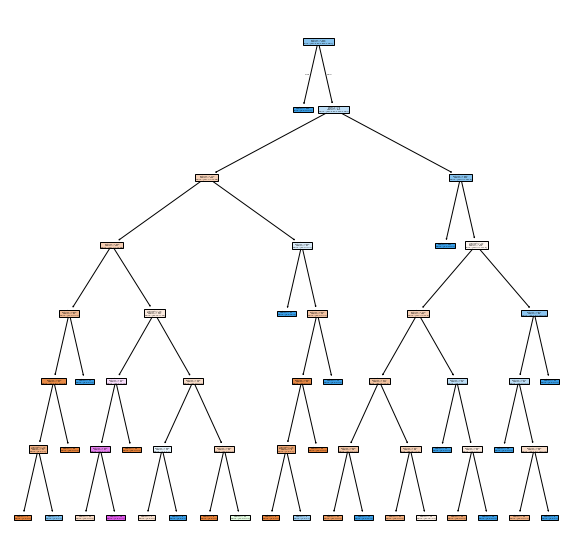

In [21]:
#Draw the decision tree - 1 marks
plt.figure(figsize=[10,10])
plot_tree(model,filled=True,feature_names=df.columns)
plt.show()

Text(0.5, 1.0, 'TV Advertising Budget vs. Sales (Training Data)')

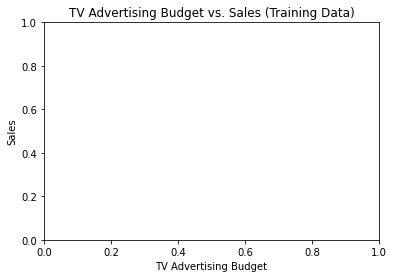

In [22]:
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.title("TV Advertising Budget vs. Sales (Training Data)")

/tmp/ipykernel_7354/2894377941.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


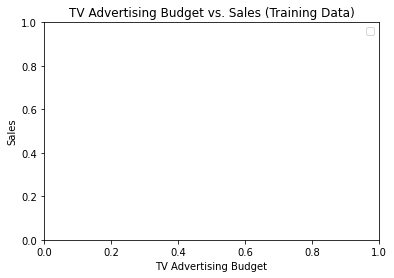

ValueError: Could not interpret value `PetalWidthCm` for `y`. An entry with this name does not appear in `data`.

In [23]:
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.title("TV Advertising Budget vs. Sales (Training Data)")

plt.legend()

plt.show()

sns.boxplot(data=df,y='PetalWidthCm')
plt.title('petal width by species')
plt.show()

sns.pairplot(data=df,hue='Species')
plt.title("all input feautures",y=1.02)
plt.show()